In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# ! pip install tensorflow
# ! pip install tensorflow-gpu
# ! pip install keras-tuner 

###**Importing libraries**

In [ ]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
from keras_tuner import RandomSearch

In [ ]:
import warnings
warnings.filterwarnings('ignore')

###**Data reading**

In [ ]:
df0 = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
 
df0 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/0.csv")
df0 = df0.drop(df0.columns[0], axis=1)  

df1 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/1.csv")
df1 = df1.drop(df1.columns[0], axis=1)  

df2 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/2.csv")
df2 = df2.drop(df2.columns[0], axis=1)  

df3 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/3.csv")
df3 = df3.drop(df3.columns[0], axis=1)  

df4 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/4.csv")
df4 = df4.drop(df4.columns[0], axis=1)  

d0 = np.array(df0)
d1 = np.array(df1)
d2 = np.array(df2)
d3 = np.array(df3)
d4 = np.array(df4)

###**Data pre-processing**

In [ ]:
X_train = []
Y_train = []

for i in range(1200):
  X_train.append(d0[i])
  Y_train.append(0)

  X_train.append(d1[i])
  Y_train.append(1)

  X_train.append(d2[i])
  Y_train.append(2)

  X_train.append(d3[i])
  Y_train.append(3)

  X_train.append(d4[i])
  Y_train.append(4)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_test = []
Y_test = []

for i in range(300):
  X_test.append(d0[1200+i])
  Y_test.append(0)

  X_test.append(d1[1200+i])
  Y_test.append(1)

  X_test.append(d2[1200+i])
  Y_test.append(2)

  X_test.append(d3[1200+i])
  Y_test.append(3)

  X_test.append(d4[1200+i])
  Y_test.append(4)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
mm = MinMaxScaler()

X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

In [ ]:
X_test, X_valid, Y_test, Y_valid = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

###**Hyperparameters tuning**

In [ ]:
def MLP2_tuning(hp):

  model = Sequential()
  model.add(Dense(hp.Int('hidden layer 1', min_value=500, max_value=2001, step=500), activation='relu', input_shape=(500, )))
  model.add(Dense(hp.Int('hidden layer 2', min_value=500, max_value=2001, step=500), activation='relu'))
  model.add(Dense(5, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

In [ ]:
tuner = RandomSearch(MLP2_tuning,
                     objective='val_accuracy',
                     max_trials=100,
                     executions_per_trial=5,
                     project_name='tuning')

tuner.search(x=X_train, y=Y_train,
             epochs=50,
             batch_size=32,
             validation_data=(X_valid, Y_valid))       

Trial 12 Complete [00h 05m 37s]
val_accuracy: 0.588266658782959

Best val_accuracy So Far: 0.5885333299636841
Total elapsed time: 01h 13m 41s
INFO:tensorflow:Oracle triggered exit


In [ ]:
print('BEST PARAMETERS')
print('hidden layer 1:', tuner.get_best_hyperparameters()[0].values['hidden layer 1'])
print('hidden layer 2:', tuner.get_best_hyperparameters()[0].values['hidden layer 2'])

BEST PARAMETERS
hidden layer 1: 1000
hidden layer 2: 2000


###**Final model training**

In [ ]:
def MLP2():

  model = Sequential()
  model.add(Dense(1000, activation='relu', input_shape=(500,)))
  model.add(Dense(2000, activation='relu'))
  model.add(Dense(5, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1000)              501000    
                                                                 
 dense_4 (Dense)             (None, 2000)              2002000   
                                                                 
 dense_5 (Dense)             (None, 5)                 10005     
                                                                 
Total params: 2,513,005
Trainable params: 2,513,005
Non-trainable params: 0
_________________________________________________________________
None






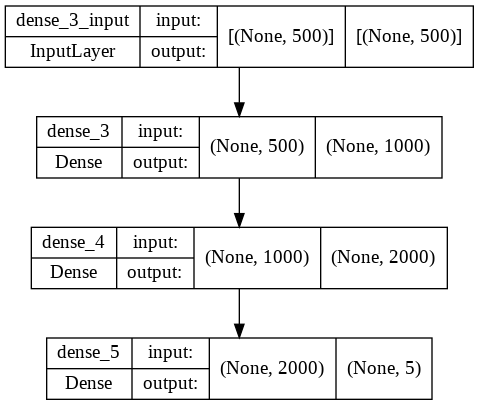

In [ ]:
mlp2 = MLP2()
print(mlp2.summary())
print('\n')
print('\n')
plot_model(mlp2, to_file='mlp2.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = mlp2.fit(X_train, Y_train, 
                   batch_size=32,
                   epochs=50, 
                   validation_data=[X_valid, Y_valid],
                   verbose=1)

Epoch 1/50
188/188 [==============================] - 2s 7ms/step - loss: 1.1002 - accuracy: 0.5030 - val_loss: 1.0819 - val_accuracy: 0.4973
Epoch 2/50
188/188 [==============================] - 1s 6ms/step - loss: 1.0211 - accuracy: 0.5323 - val_loss: 1.0197 - val_accuracy: 0.5373
Epoch 3/50
188/188 [==============================] - 1s 6ms/step - loss: 0.9943 - accuracy: 0.5420 - val_loss: 0.9871 - val_accuracy: 0.5333
Epoch 4/50
188/188 [==============================] - 1s 6ms/step - loss: 0.9815 - accuracy: 0.5408 - val_loss: 1.0110 - val_accuracy: 0.5253
Epoch 5/50
188/188 [==============================] - 1s 6ms/step - loss: 0.9680 - accuracy: 0.5473 - val_loss: 1.0369 - val_accuracy: 0.5400
Epoch 6/50
188/188 [==============================] - 1s 6ms/step - loss: 0.9575 - accuracy: 0.5508 - val_loss: 0.9519 - val_accuracy: 0.5440
Epoch 7/50
188/188 [==============================] - 1s 6ms/step - loss: 0.9401 - accuracy: 0.5512 - val_loss: 1.0682 - val_accuracy: 0.5133
Epoch 

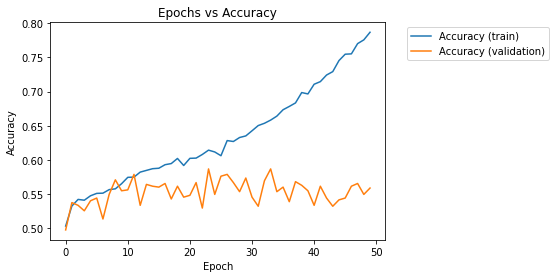

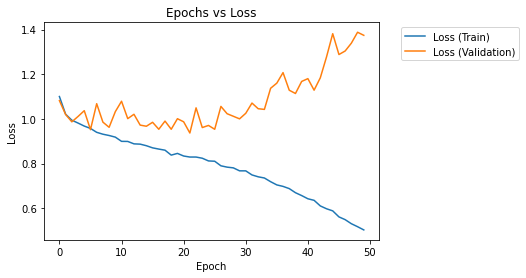

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy (train)')
plt.plot(history.history['val_accuracy'], label = 'Accuracy (validation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.figure()

plt.plot(history.history['loss'], label='Loss (Train)')
plt.plot(history.history['val_loss'], label = 'Loss (Validation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
Y_pred_train = np.argmax(mlp2.predict(X_train), axis=1)
Y_pred_test = np.argmax(mlp2.predict(X_test), axis=1)

print("Classification Report(Train)\n")
print(classification_report(Y_train, Y_pred_train))

print('\n')

print("Classification Report(Test)\n")
print(classification_report(Y_test, Y_pred_test))

Classification Report(Train)

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1200
           1       0.86      0.55      0.67      1200
           2       0.86      0.98      0.92      1200
           3       0.73      0.85      0.79      1200
           4       0.86      0.79      0.83      1200

    accuracy                           0.80      6000
   macro avg       0.80      0.80      0.79      6000
weighted avg       0.80      0.80      0.79      6000



Classification Report(Test)

              precision    recall  f1-score   support

           0       0.47      0.57      0.51       150
           1       0.36      0.21      0.26       150
           2       0.72      0.82      0.77       154
           3       0.55      0.64      0.59       148
           4       0.62      0.56      0.59       148

    accuracy                           0.56       750
   macro avg       0.54      0.56      0.54       750
weighted avg    

Train CM


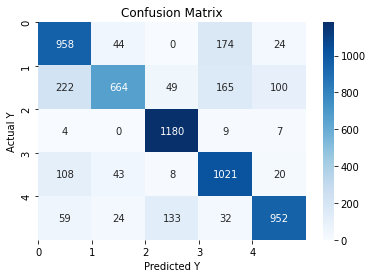





Test CM


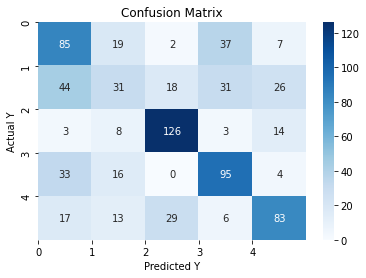

In [ ]:
print('Train CM')
cm = confusion_matrix(Y_train, Y_pred_train)

sns.heatmap(cm, annot=True, fmt='.4g', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(5));
plt.yticks(np.arange(5));
plt.show()

print('\n')
print('\n')

print('Test CM')
cm = confusion_matrix(Y_test, Y_pred_test)

sns.heatmap(cm, annot=True, fmt='.3g', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(5));
plt.yticks(np.arange(5));

plt.show()